# 机器学习练习1 - 线性回归

## 线性回归

用函数一个个讲解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [3]:
## 读取数据
path = 'C:\\Users\\Gillian\\Desktop\\regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。  

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
Y_data = data.iloc[:,cols-1:]#X是所有行，最后一列
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=42)

看下原始数据长什么样子，进行画图

In [5]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
(X_train)

,人口
95,13.3940
30,5.2524
28,13.1760
87,6.0020
5,8.3829
...,...
60,8.8254
71,7.3345
14,5.6407
92,5.8707


in,Y_train,'bo')数据进行标准化
$$x= \frac{x-\mu }{\sigma} $$

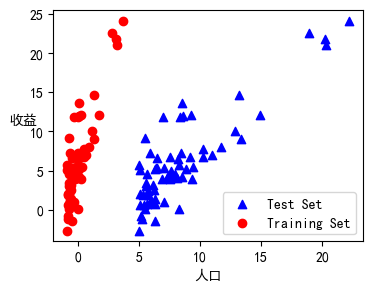

In [7]:
# 计算训练集的均值和标准差  
xmean = X_train.mean()  
xstd = X_train.std()  

plt.figure(figsize=(4, 3)) 
feature_to_plot="人口"
plt.scatter(X_train[feature_to_plot], Y_train, color='blue', label='Test Set', marker='^')  

# 避免除以零的情况  
xstd[xstd == 0] = 1e-7  
# 对 X_train 进行标准化处理  
X_train= (X_train - xmean) / xstd  
X_test=(X_test- xmean) / xstd  

# 绘制标准化后的训练集的散点图  

plt.scatter(X_train[feature_to_plot], Y_train, color='red', label='Training Set')  # 假设我们绘制第一个特征与收益的关系  

plt.xlabel('人口')  # 修改标签以反映数据已被标准化  
plt.ylabel('收益', rotation=0)  # 通常标签不需要旋转，除非空间不足  
plt.legend()  
plt.show()


In [8]:
print(X_train.head)

<bound method NDFrame.head of           人口
95  1.346313
30 -0.802985
28  1.288763
87 -0.605098
5   0.023435
..       ...
60  0.140250
71 -0.253332
14 -0.700477
92 -0.639760
51 -0.788386

[67 rows x 1 columns]>


In [9]:
X_train.insert(0, 'Ones', 1)
X_test.insert(0,'Ones',1)

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

In [10]:
Xtr=X_train.values
Ytr=Y_train.values
Xte=X_test.values
Yte=Y_test.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

创造一个参数以$\omega$为特征函数的代价函数，并将其正则化
$$J(w)=\frac{1}{2} \sum_{n=1}^{N}\left(y\left(x_{n}, w\right)-t_{n}\right)^{2}+\frac{\lambda}{2}\|w\|_{2}^{2}$$


其中：\\[y\left(x_{n}, w\right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 
注意：这里所有的样本$x_0$都为1

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

从数据中分离出特征属性X和目标向量Y，并对模型参数进行初始化，同时计算当前的损失。

代价函数是应该是numpy数组，所以我们需要从dataframeX_data和Y_data中读取数据，然后才能使用它们。
此外，我们还需要初始化w。

注意***，根据维度，我们写出线性回归的模型：Y=np.dot(X,W) 也就是说  (m,n) @ (n, 1) -> (m, 1),
则线性回归模型写为：$${{f}}\left( X\right)=XW$$
因此，我们定义模型的损失函数为：$$ loss =\frac{(XW-Y)^T(XW-Y)}{2m}+\frac{\lambda }{2}W ^{T} W   $$


对于w有：
$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \alpha(\frac{1}{m} X_j^T(f(X)-Y)+\lambda\omega_{j })  $$

注意：这里 $X_j$代表所有样本第$j$个特征组成的向量，大小为$m\times1$，$f(X)$代表所有样本的预测值, $Y$为所有样本的预测值，大小为$m\times1$。 

写成矩阵的形式：
$${W}:={W}- \alpha dW:=W-\alpha(\frac{ X^T(f(X)-Y)}{m}+\lambda W)$$




In [11]:
  def computeCost(X, Y, W, lambda_):  
    Y_hat = np.dot(X, W)  
    mse_loss = np.sum((Y_hat - Y) ** 2) / X.shape[0]  
      
    l2_reg = lambda_ * np.sum(W ** 2) 
      
    total_loss = mse_loss + l2_reg 
    return total_loss

In [12]:
def gradientDescent(X, Y, W, alpha, lambda_):  
    num_train = X.shape[0]  
    Y_hat = np.dot(X, W)
    dW = (1 / num_train) * np.dot(X.T, (Y_hat - Y))   
    dW[1:] += (lambda_ / num_train) * W[1:]  
    W -= alpha * dW
    return W

In [13]:
def linearRegression(X, Y, alpha, iters, lambda_):
    loss_his = []
    feature_dim = X.shape[1]
    w_data = []  # 初始化权重数据列表
    W = np.zeros((feature_dim, 1))  # 初始化权重矩阵

    for i in range(iters):
        loss = computeCost(X, Y, W, lambda_)  # 计算损失
        loss_his.append(loss)  # 将损失添加到历史记录中
        W = gradientDescent(X, Y, W, alpha, lambda_)  # 执行梯度下降更新权重
        w_data.append(W.copy())  # 将更新后的权重添加到权重数据列表中

    return loss_his, w_data
    

In [14]:
alpha =0.001
iters = 10000
lambda_=0.01
loss_his,w_data = linearRegression(Xtr,Ytr, alpha, iters,lambda_)
loss_train=[]
loss_test=[]
for w in w_data:
    loss_train.append(computeCost(Xtr,Ytr,w,lambda_))
    loss_test.append(computeCost(Xte,Yte,w,lambda_))

Text(0, 0.5, 'loss')

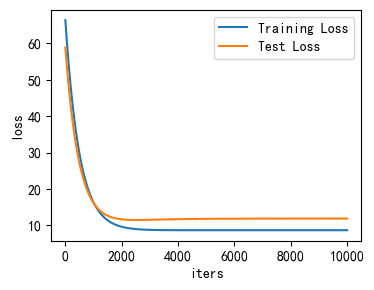

In [15]:
plt.figure(figsize=(4,3))
x = range(iters)
plt.plot(x, loss_train, label='Training Loss')
plt.plot(x, loss_test, label='Test Loss')
plt.legend()  
plt.xlabel("iters")
plt.ylabel("loss")

$$𝝎^∗  =[(𝒙𝒙^𝑻)]^{-1}𝒙^{T}𝒕$$
$$y=\omega x+b$$

用最小二乘法计算W的值

In [16]:
def predict_lsq(X, W):
    y_pre = np.dot(W[1,0],X)+W[0,0]
    return y_pre

In [17]:
A=np.linalg.inv(Xtr.T@Xtr)
w_l=A@Xtr.T
w_last=w_l@(Ytr)

In [18]:
def predict_with_gd(X, b, fw): 
    return b + np.dot( X,fw) 

In [19]:
final_weights = loss_his[-1]
b = w_data[-1][0]
fw = w_data[-1][0] 
print(fw)

[5.94309286]


In [20]:
x_train_data = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100).reshape(-1, 1)
y_train_data_lsq = predict_lsq(x_train_data,w_last)
y_train_data_g=predict_with_gd(x_train_data,b,fw)
x_test_data = np.linspace(X_test['人口'].min(), X_test['人口'].max(), 100).reshape(-1, 1)
y_test_data_lsq = predict_lsq(x_test_data,w_last)
y_test_data_g=predict_with_gd(x_test_data,b,fw)


C:\Users\Gillian\AppData\Local\Temp\ipykernel_22608\3299267092.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x_train_data,y_train_data_g , 'r', color='green',label='梯度下降训练集预测值')
C:\Users\Gillian\AppData\Local\Temp\ipykernel_22608\3299267092.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x_test_data,y_test_data_lsq , 'r',color='purple', label='lsq测试集预测值')
C:\Users\Gillian\AppData\Local\Temp\ipykernel_22608\3299267092.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x_test_data,y_test_data_g , 'r', color='blue',label='梯度下降测试集预测值')


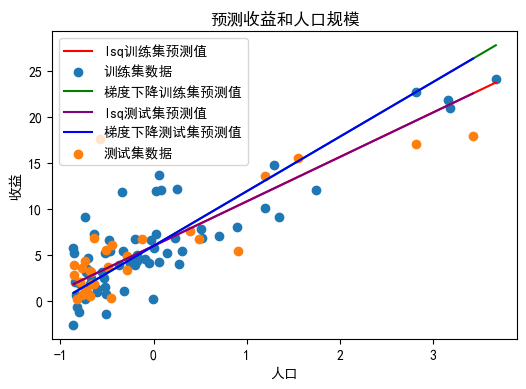

In [21]:

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_train_data,y_train_data_lsq , color='red', label='lsq训练集预测值')
ax.scatter(X_train['人口'], Y_train['收益'], label='训练集数据')
ax.plot(x_train_data,y_train_data_g , 'r', color='green',label='梯度下降训练集预测值')
ax.plot(x_test_data,y_test_data_lsq , 'r',color='purple', label='lsq测试集预测值')
ax.plot(x_test_data,y_test_data_g , 'r', color='blue',label='梯度下降测试集预测值')
ax.scatter(X_test['人口'], Y_test['收益'], label='测试集数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

## 单变量线性回归

用类来实现

## 参考
[1] Andrew Ng. Machine Learning[EB/OL]. StanfordUniversity,2014.https://www.coursera.org/course/ml

[2] 李航. 统计学习方法[M]. 北京: 清华大学出版社,2019.